# Punto 4: Distancia de frobenius
## Integrantes:

#### Sebastián Ramírez Escobar
#### Sebastian Carvalho Salazar
#### Jhoan Stiven Paez Bermudez

Tómese una foto tipo documento y transformela a escala de grises y resolución 400 × 600. Defina una sucesión de imágenes que sea convergente a su foto. Muestre al menos 10 términos de la sucesión incluyendo el elemento 100-ésimo. Como la sucesión es convergente, obtenga el término tal que todas las imágenes siguientes en tienen una distancia (en norma de Frobenius) menor a 0.5 de su foto.

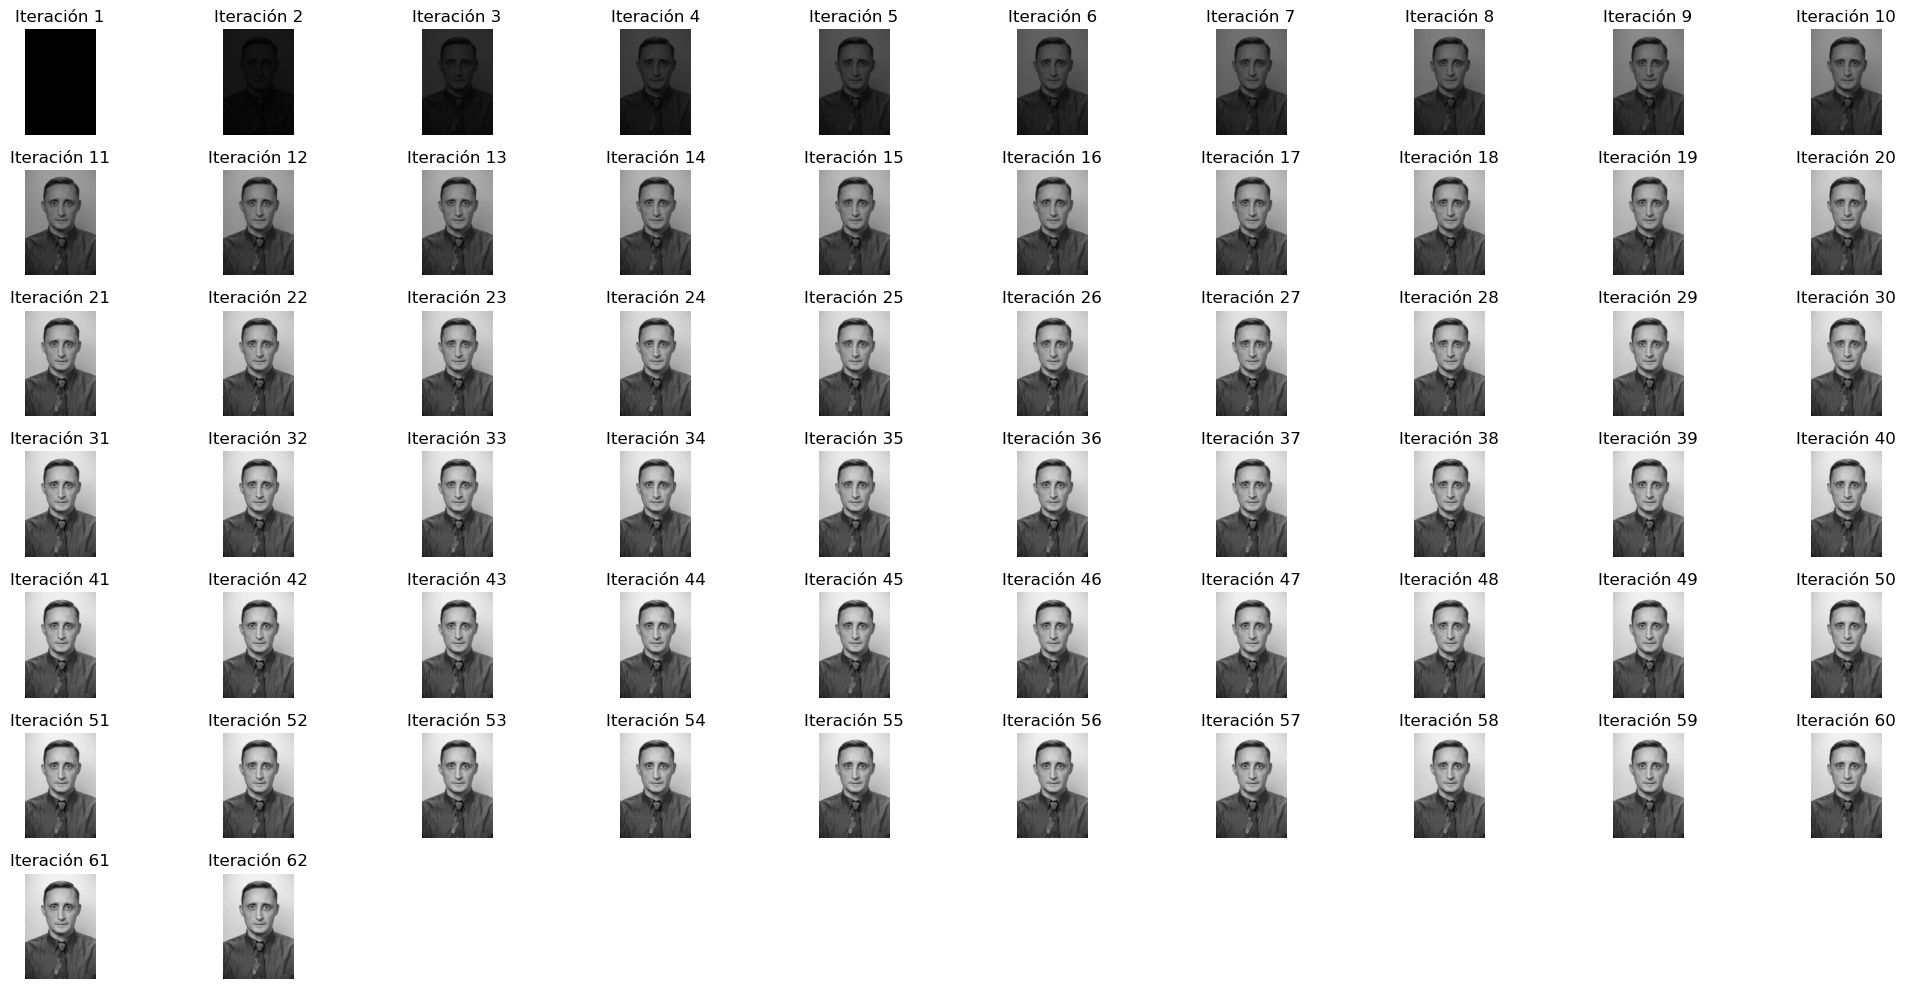

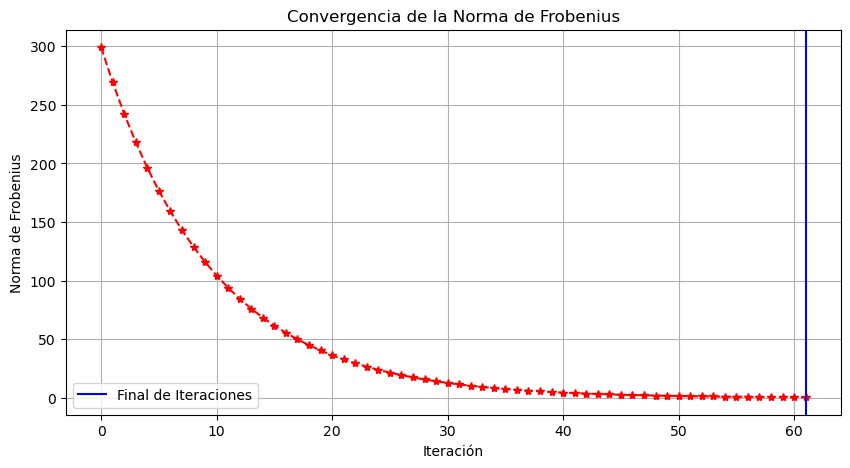

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def normalize_image(image):
    # Normaliza una imagen para que sus valores estén en el rango [0, 1]
    return image.astype(np.float32) / 255.0

def frobenius_distance(matrix1, matrix2):
    # Calcula la distancia de Frobenius entre dos matrices
    return np.linalg.norm(matrix1 - matrix2)

def generar_secuencia_imagenes(ruta_imagen, factor_convergencia, num_iteraciones, stop_threshold):
    # Cargar la imagen original de 400x600 en blanco y negro
    original_image = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    if original_image is None:
        print("Error: No se pudo cargar la imagen original.")
        return

    original_image = cv2.resize(original_image, (400, 600))
    original_image = normalize_image(original_image)

    # Generar una imagen aleatoria del mismo tamaño que la imagen original
    random_image = np.random.rand(600, 400)  # Cambia el orden de las dimensiones
    random_image = normalize_image(random_image)

    # Inicializa la sucesión de imágenes con la imagen aleatoria normalizada
    sequence = [random_image]

    frobenius_norms = []  # Vector para almacenar las normas de Frobenius

    for i in range(num_iteraciones):
        
        # Calcula la diferencia entre la imagen original y la última imagen generada
        difference = original_image - sequence[-1]

        # Calcula la norma de Frobenius de la diferencia
        frobenius_norm = frobenius_distance(original_image, sequence[-1])
        frobenius_norms.append(frobenius_norm)
        
        # Comprueba si se alcanzó el umbral de similitud
        if frobenius_norm <= stop_threshold:
            break

        # Actualiza la imagen generada aleatoriamente en función del factor de convergencia y la diferencia
        new_image = sequence[-1] + factor_convergencia * difference

        # Agrega la nueva imagen normalizada a la sucesión
        sequence.append(new_image)

    # Muestra las imágenes en la sucesión
    plt.figure(figsize=(20, 10))
    num_cols = 10
    num_rows = int((len(sequence) + 1) / num_cols) + 1
    for i, image in enumerate(sequence):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(image, cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
        plt.title(f'Iteración {i+1}')

    plt.tight_layout()  # Para asegurarse de que los subgráficos se ajusten correctamente
    
    # Graficar las normas de Frobenius
    plt.figure(figsize=(10, 5))
    plt.plot(frobenius_norms, marker='*', linestyle='--', color='r')
    plt.xlabel('Iteración')
    plt.ylabel('Norma de Frobenius')
    plt.title('Convergencia de la Norma de Frobenius')
    
    # Marcar dónde se detienen las iteraciones
    if len(frobenius_norms) > 0:
        plt.axvline(x=len(frobenius_norms) - 1, color='b', linestyle='-', label='Final de Iteraciones')
    
    plt.legend()
    plt.grid()
    plt.show()

# Ejemplo de uso:
ruta_imagen = './assets/fotopersonal.jpg'
factor_convergencia = 0.1
num_iteraciones = 100
stop_threshold = 0.5  # Umbral de similitud
generar_secuencia_imagenes(ruta_imagen, factor_convergencia, num_iteraciones, stop_threshold)
